In [5]:
import numpy as np
import matplotlib.pyplot as plt

def open_ras_file(filename):
  """Opens a .ras file and returns the data as a NumPy array."""
  with open(filename, 'r',encoding= 'unicode_escape') as f:
    data = []
    for line in f:
      if not line.startswith('*'):
        data.append([float(x) for x in line.split()])
  return np.array(data)

def RasRead(filename):
  N=open_ras_file(filename)
  x=N[:,0]
  y=N[:,1]*N[:,2]
  fig, ax = plt.subplots()
  ax.scatter(x,y,s=1)
  return x,y


In [6]:
filename="G30S10-GI-XRD-Si.ras"

In [7]:
import os
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal
#pip install lmfit
from lmfit import models

def open_ras_file(filename):
  """Opens a .ras file and returns the data as a NumPy array."""
  with open(filename, 'r',encoding= 'unicode_escape') as f:
    data = []
    for line in f:
      if not line.startswith('*'):
        data.append([float(x) for x in line.split()])
  return np.array(data)

def parter(min, max,x,y):
  min_index=np.where(x==min)[0][0]
  max_index=np.where(x==max)[0][0]
  x0=x[min_index:max_index]
  y0=y[min_index:max_index]
  return x0,y0
N=open_ras_file(filename)

def cost(parameters):
    g_0 = parameters[:3]
    g_1 = parameters[3:6]
    g_2 = parameters[6:9]
    return np.sum(np.power(g(x, *g_0) + g(x, *g_1)+ g(x, *g_2) - y, 2)) / len(x)



def SimXrdFit(filename,min, max):
  x=N[:,0]
  y=N[:,1]*N[:,2]
  x,y=parter(min,max,x,y)
  fig, ax = plt.subplots()
  ax.scatter(x,y,s=1)
  initial_guess = [1, 42.8, 1, 1, 43, 1,1, 44.2, 1]
  result = optimize.minimize(cost, initial_guess)
  print('steps', result.nit, result.fun)
  print(f'g_0: amplitude: {result.x[0]:3.3f} mean: {result.x[1]:3.3f} sigma: {result.x[2]:3.3f}')
  print(f'g_1: amplitude: {result.x[3]:3.3f} mean: {result.x[4]:3.3f} sigma: {result.x[5]:3.3f}')
  print(f'g_2: amplitude: {result.x[6]:3.3f} mean: {result.x[7]:3.3f} sigma: {result.x[8]:3.3f}')
  


NameError: name 'g' is not defined

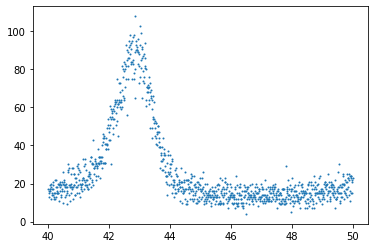

In [12]:
SimXrdFit(filename,40,50)

In [8]:
def update_spec_from_peaks(spec, model_indicies, peak_widths=(10, 25), **kwargs):
    x = spec['x']
    y = spec['y']
    x_range = np.max(x) - np.min(x)
    peak_indicies = signal.find_peaks_cwt(y, peak_widths)
    np.random.shuffle(peak_indicies)
    for peak_indicie, model_indicie in zip(peak_indicies.tolist(), model_indicies):
        model = spec['model'][model_indicie]
        if model['type'] in ['GaussianModel', 'LorentzianModel', 'VoigtModel']:
            params = {
                'height': y[peak_indicie],
                'sigma': x_range / len(x) * np.min(peak_widths),
                'center': x[peak_indicie]
            }
            if 'params' in model:
                model.update(params)
            else:
                model['params'] = params
        else:
            raise NotImplemented(f'model {basis_func["type"]} not implemented yet')
    return peak_indicies

def xrdpeaks(filename):
    x,y=ReadRas(filename)
    spec = {
    'x': x,
    'y': y,
    'model': [
        {'type': 'VoigtModel'},
        {'type': 'VoigtModel'},
        {'type': 'VoigtModel'},
        {'type': 'VoigtModel'},
        {'type': 'GaussianModel'},
        {'type': 'GaussianModel'},
        {'type': 'GaussianModel'},
        {'type': 'GaussianModel'},
        ]
    }

    peaks_found = update_spec_from_peaks(spec, [0, 1, 2, 3, 4, 5, 6], peak_widths=(50,))
    fig, ax = plt.subplots()
    ax.scatter(spec['x'], spec['y'], s=4)
    for i in peaks_found:
        ax.axvline(x=spec['x'][i], c='black', linestyle='dotted')
    return peaks_found
    
